<a href="https://colab.research.google.com/github/Pooja-2709/Bike_demand_prediction/blob/main/Bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Name -**
**Bike Sharing Demand Prediction**

**Project Type** - Regression

**Contribution**    - Individual

**Team Member** - Pooja Rathore


# **Project Summary -**

Bike Seoul is a bike sharing service in the city of Seoul, South Korea. It is part of the city's efforts to promote sustainable transportation and reduce traffic congestion. The service allows residents and visitors to rent bicycles at various stations across the city and return them to any other station, providing a convenient and eco-friendly mode of transportation. In recent years, the demand for bike rentals in Seoul has increased, leading to the need for a more efficient and effective way to manage the bike sharing operations. Accurately predicting bike demand is crucial for optimizing fleet management, ensuring the availability of bikes at high-demand locations, and reducing waste and costs.

The main objective of this project is to develop a machine learning model that can accurately predict the demand for bike rentals in Seoul, South Korea, based on historical data and various relevant factors such as weather conditions, time of day, and public holidays. In this project we have used regression analysis techniques to model the bike demand data. The model trained on a large dataset of past bike rental information, along with relevant weather and time data. The model then be tested and evaluated using metrics such as mean squared error and r-squared values. The actual data is from the Seoul city government's open data portal, and this dataset is also available on Kaggle.

So, our main goal was to achieve an accuracy of at least 85% in the bike demand predictions, which would help the city's bike sharing service providers plan their fleet operations more effectively and respond to demand changes in real-time. We have performed lots of regression algorithms like linear regression, random forest, decision tree, gradient boosting , Xtreme gradient boosting, also we tried to do hyperparameter tuning and cross validation to improve the accuracy of the model. And finally we have decided to select Xtreme gradient boosting algorithm because it gave us high accuracy around 93% and 90% on train and test data resp.

This project not only provided valuable insights into bike demand patterns in Seoul but also demonstrated the practical applications of machine learning in addressing real-world problems. The findings could potentially be extended to other cities with similar bike sharing systems, leading to improved services for bike users and more sustainable transportation system

# **GitHub Link -**

# **Problem Statement**
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

**Data Overview**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

**Attribute Information**

*   Date : year-month-day

*   Rented Bike count - Count of bikes rented at each hour

*   Hour - Hour of he day

*   Temperature-Temperature in Celsius

*   Humidity - %

*   Windspeed - m/s

*   Visibility - 10m

*   Dew point temperature - Celsius

*   Solar radiation - MJ/m2

*   Rainfall - mm

*   Snowfall - cm

*   Seasons - Winter, Spring, Summer, Autumn

*   Holiday - Holiday/No holiday

*   Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


# ***Let's Begin !***

## ***1. Know Your Data***

In [1]:
# #Connecting to the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading


In [4]:
#import the file from the drive
path = '/content/drive/MyDrive/Colab Notebooks/almabetter project 2/SeoulBikeData.csv'
data = pd.read_csv(path, encoding = "ISO-8859-1")

In [5]:
df = data.copy()

### Dataset First View


In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count


In [8]:
#total rows and column present in the dataset
df.shape

(8760, 14)

8760 rows and 14 columns present in our dataset

### Dataset Information

In [9]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

In [11]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [12]:
print(f' We have {df.duplicated().sum()} duplicate values in dataset.')

 We have 0 duplicate values in dataset.


#### Missing Values/Null Values

In [13]:
# Total Missing Values/Null Values
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


There are no missing/null values in dataset


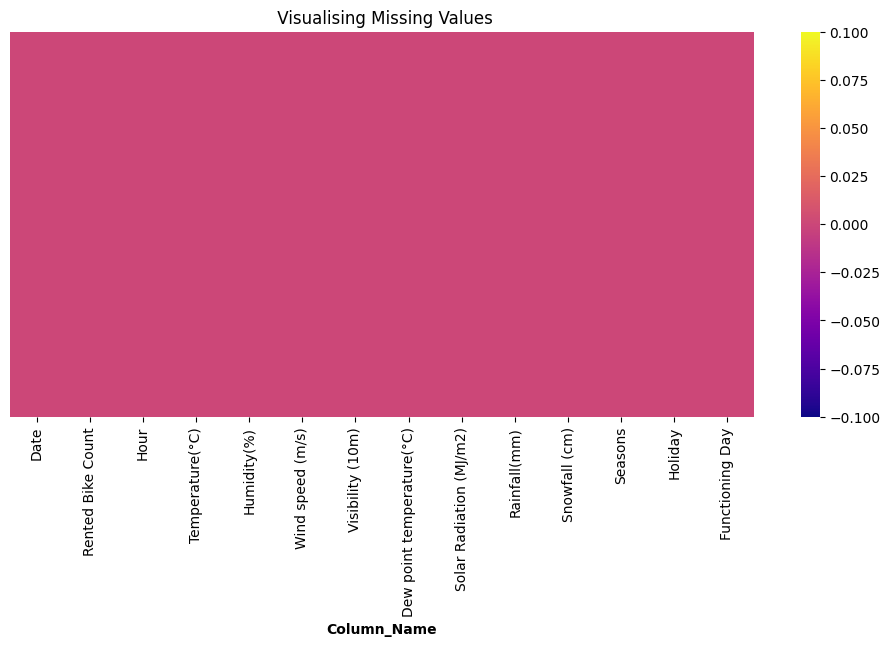

In [14]:
# Visualizing the missing values
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.xlabel("Column_Name", size=10, weight="bold")
plt.title(" Visualising Missing Values")
plt.show()

#**Information about the dataset**

The dataset provided information about the demand for rental bikes in Seoul, a city in South Korea. It contains data on various weather factors such as temperature, humidity, rainfall, snowfall, and dew point temperature, among others.

There are different factors present in our dataset and we have to analyse how these factors are related to our target variable.


Our objective is to gain insights and make predictions about the number of bikes that should be available on an hourly basis.

The dataset contains 8760 rows and 14 columns.

There are no mising/null and duplicate values in the given dataset.


## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [16]:
# Dataset Describe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Check Unique Values for each variable.


In [17]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),"")

No. of unique values in  Date is 365 
No. of unique values in  Rented Bike Count is 2166 
No. of unique values in  Hour is 24 
No. of unique values in  Temperature(°C) is 546 
No. of unique values in  Humidity(%) is 90 
No. of unique values in  Wind speed (m/s) is 65 
No. of unique values in  Visibility (10m) is 1789 
No. of unique values in  Dew point temperature(°C) is 556 
No. of unique values in  Solar Radiation (MJ/m2) is 345 
No. of unique values in  Rainfall(mm) is 61 
No. of unique values in  Snowfall (cm) is 51 
No. of unique values in  Seasons is 4 
No. of unique values in  Holiday is 2 
No. of unique values in  Functioning Day is 2 


## 3. ***Data Wrangling***

### Data Wrangling Code


*   Breaking Date Columns and creating a new column Weekday/Weekend
*   Drop unwanted column which is not required for further processing



In [18]:
#Convert the date column to datetime format
df['Date']= pd.to_datetime(df['Date'])

In [19]:
#Extract day, month, year from the 'Date' column
df['Year']= pd.to_datetime(df['Date']).dt.year
df['Month']= pd.to_datetime(df['Date']).dt.month
df['Day']=df['Date'].dt.day_name()
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday


In [20]:
df['weekdays/weekend']=df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','Day','Year'],axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int64



*    we convert the date column into three new column i.e. "Year", "month", and "weekdays/weekend"
*   From the above graph we can clearly see that the "Year" column have only 2 unique values from december 2017 to november 2018, we can consider this almost one year. we don't need this column so we drop "Year" column
*  From the date column we can create a new column "weekday/weekend". It containd the details about the each day of the month majorly divided into 2 categories i.e. weekdays or weekend.




In [22]:
df['weekdays/weekend'].value_counts()

0    6216
1    2544
Name: weekdays/weekend, dtype: int64

## Change Data Type

The columns labeled as "Hour," "Month," and "Weekdays/Weekend" currently have integer data types, but they should actually be treated as categorical data. If we don't change their data type, it could lead to incorrect analysis and misleading results when trying to correlate with other variables

In [23]:
#Change the integer column into categorical column
cols=['Hour','Month','weekdays/weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  Month                      8760 n

## Exploratory Data Analysis

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Analysis of Categorical variable**




Chart - 1

[Text(0.5, 1.0, 'Seasons Vs Rented Bike Count')]

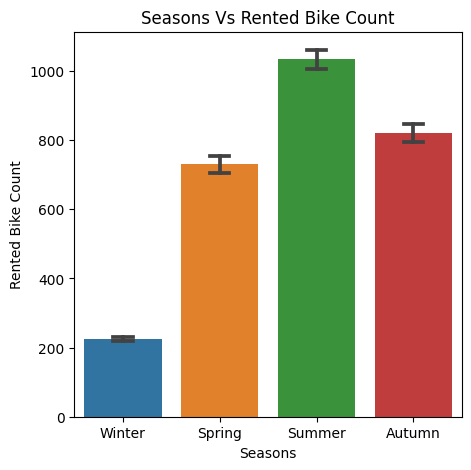

In [25]:
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(x='Seasons',y='Rented Bike Count', data=df, capsize=.2)
ax.set(title='Seasons Vs Rented Bike Count')


Conclusion -

1.   During the summer season Count of Rented Bike is Highest followed by Autmn and Spring seasons.
2.   In winter seasons peoples are less prefer rental bikes as compare to the other seasons



Chart - 2

[Text(0.5, 1.0, 'Month vs Rented Bike Count')]

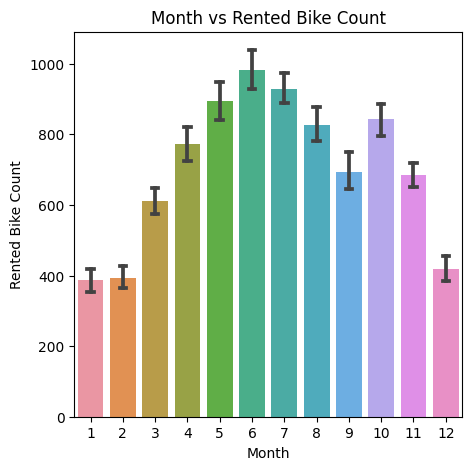

In [26]:
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(x='Month',y='Rented Bike Count',data=df,capsize=.2)
ax.set(title='Month vs Rented Bike Count')

Conclusion -

*   In the month of June having highest number of rented bike count
*   From the month of march Bike rent counting started Increasing



Chart - 3

[Text(0.5, 1.0, 'Holiday vs Rented Bike Count ')]

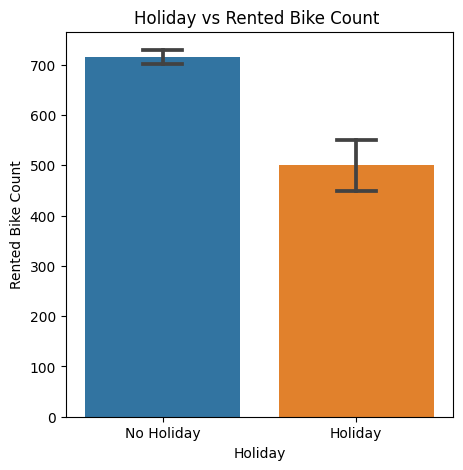

In [27]:
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Holiday vs Rented Bike Count ')

Conclusion -

*   Non Holiday days having higher number of count of rental bike.
*   Approax 700 rented bike count on Non Holiday days



Chart - 4

[Text(0.5, 1.0, 'Functioning Day vs Rented Bike Count ')]

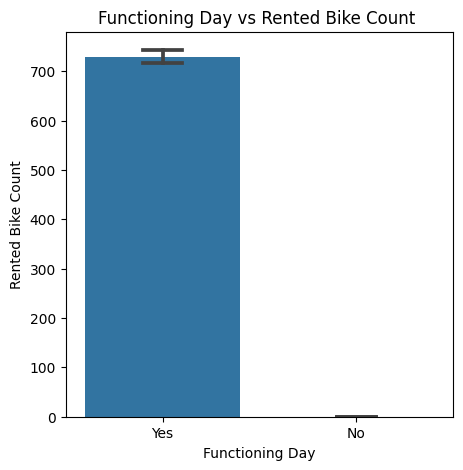

In [28]:
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Functioning Day vs Rented Bike Count ')


Conclusion -

*   Approax 700 bikes are rented on Functioning Day
*   No bikes are rented on No functioning Day



Chart - 5

[Text(0.5, 1.0, '1 :- weekend   0 :- weekdays Vs Rented Bike Count')]

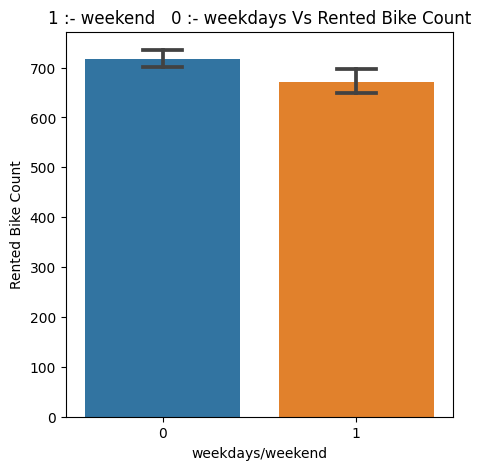

In [29]:
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='weekdays/weekend',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='1 :- weekend   0 :- weekdays Vs Rented Bike Count')

Conclusion -

*   More than 700 bikes were rented on weekdays
*   Approax 650 bikes were rented on weekend



Chart - 6

[Text(0.5, 1.0, 'Hourly basis rented bike count on Holiday categories')]

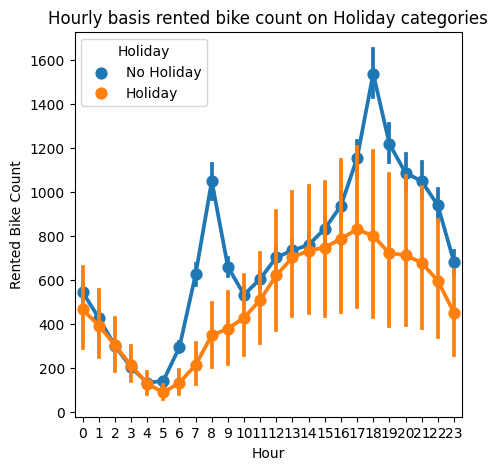

In [30]:
fig,ax=plt.subplots(figsize=(5,5))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Hourly basis rented bike count on Holiday categories')

Conclusion -

*   The above grpah shows the average rented bike count at different hours of the day, separated by holidays and non-holidays.
*   This graph shows that hours from 6-10 and 17-19 indicating high demands of rental bikes in case of No Holiday


Chart - 7

[Text(0.5, 1.0, 'Hourly basis rented bike count on Functioning Day')]

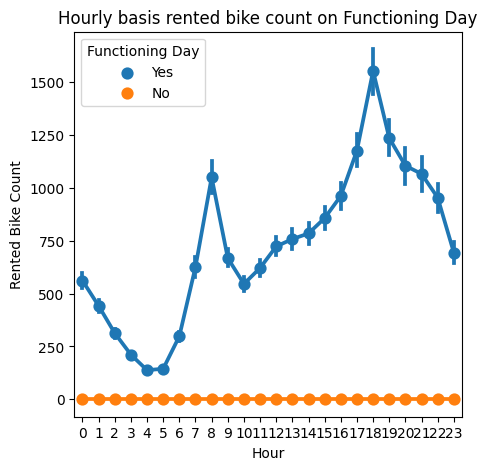

In [31]:
fig,ax=plt.subplots(figsize=(5,5))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Hourly basis rented bike count on Functioning Day')

Conclusion -

*   The pattern for the functioning day is similar to the No Holiday
*   In case of non functioning day there were zero rental bikes



Chart - 8

[Text(0.5, 1.0, 'Hourly basis rented bike count on Seasons')]

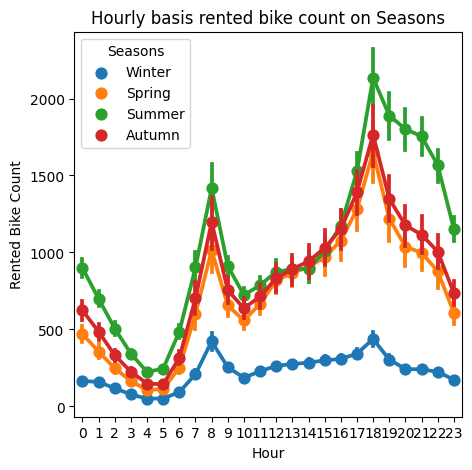

In [32]:
fig,ax=plt.subplots(figsize=(5,5))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Hourly basis rented bike count on Seasons')


Conclusion -

*  During the summer season,  there is a significant increase in the usage of rented bikes, with peak demand occurring between 7-9 and 17-19.

*  The usage of rental bikes is very low, during the winter season



Chart - 9

[Text(0.5, 1.0, '1 for sunday/saturday   0 for other day ')]

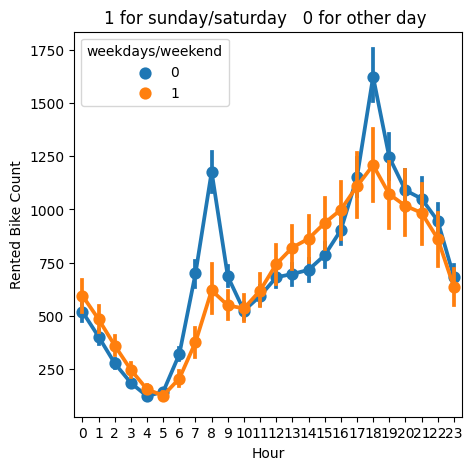

In [33]:
fig,ax=plt.subplots(figsize=(5,5))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='weekdays/weekend',ax=ax)
ax.set(title='1 for sunday/saturday   0 for other day ')


Conclusion -

*   From the above graph we can say that there is high demand of rental bike in weekdays between 7-9 and 17-19 which is represented as blue color line
*   Weekend days represented as orange line, During weekend the usage of rental bikes between 0-11 is very low then started increases from 11-17 then again the usage is decreases



## Analyze numerical Variable

In [34]:
#assign the numerical coulmn to variable
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

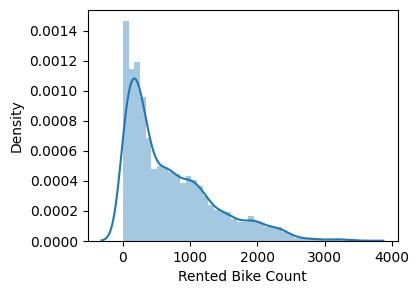

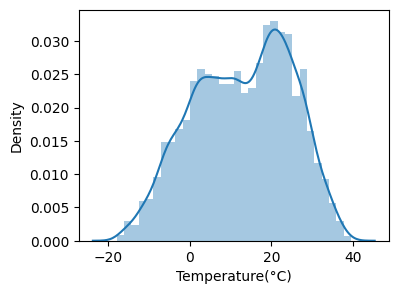

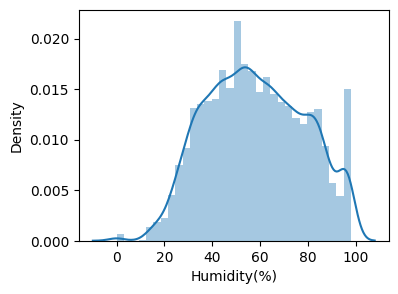

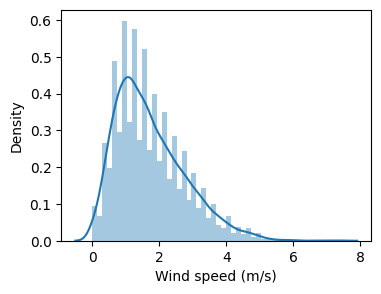

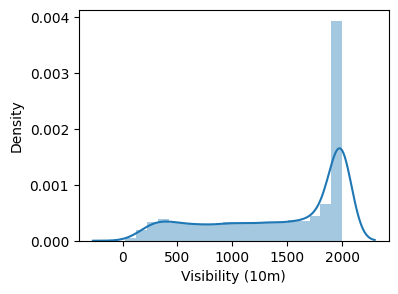

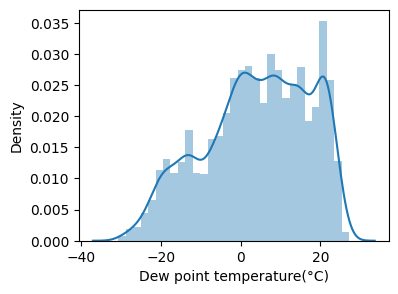

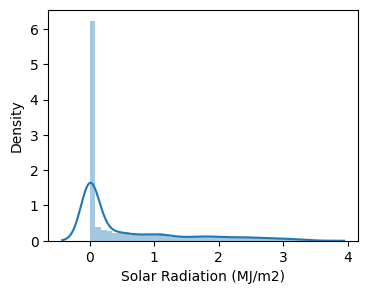

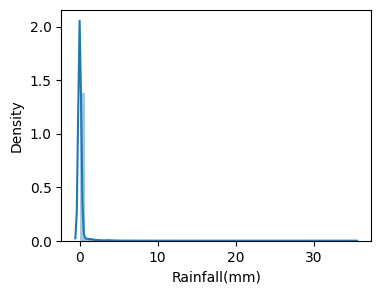

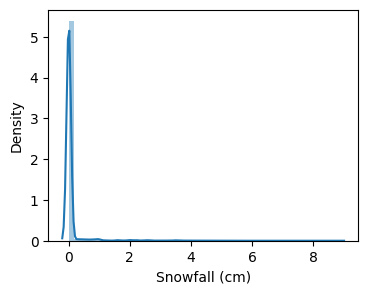

In [35]:
# it print all displots to check skewness and  the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(4,3))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

Conclusion -

*   People are more likely to ride bike when temperature in between 20-40
*   People more likely to prefer riding bikes when the temperature is around 25°C on average.
*   In case of solar radiations the count of rental bike is rising (apporax 1000)

*  when we have more than 4cm snow, the count of rental bike is very low
*  From the above graph we can see that even in the presence of heavy rainfall, the demand for rented bikes remains high

*   The demand for rented bikes appears to be consistent regardless of wind speed. However, there is an increase in demand when the wind speed reaches 7 m/s, indicating that people enjoy riding bikes when it's slightly windy.






**Checking the relationship**

In [36]:
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

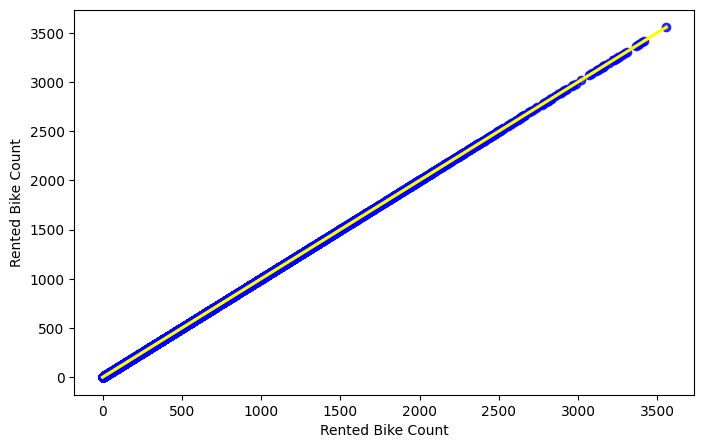

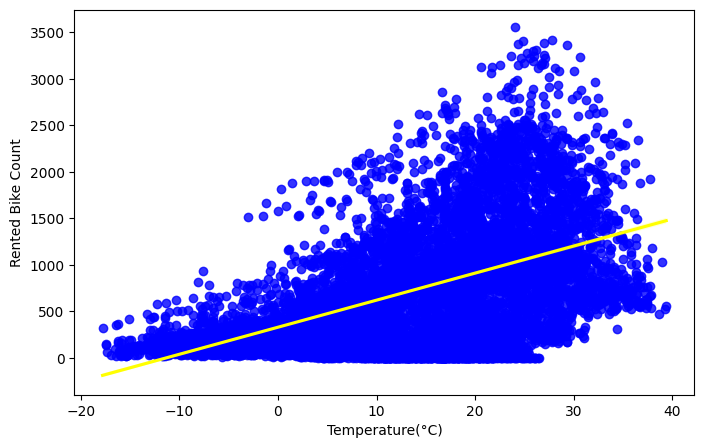

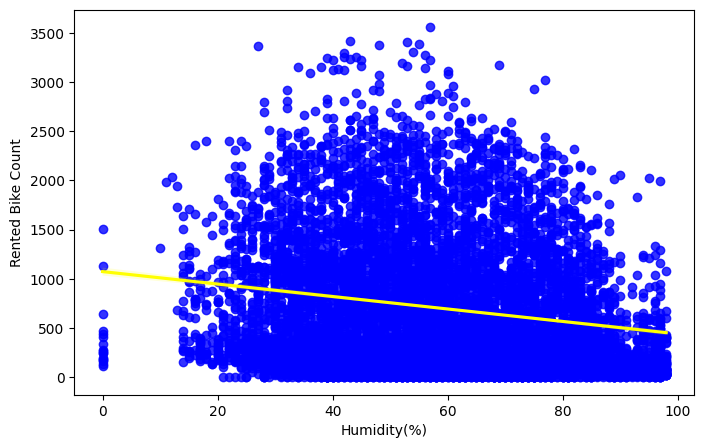

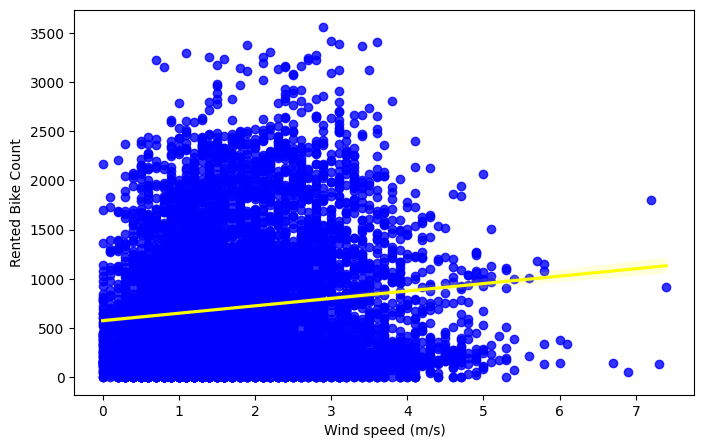

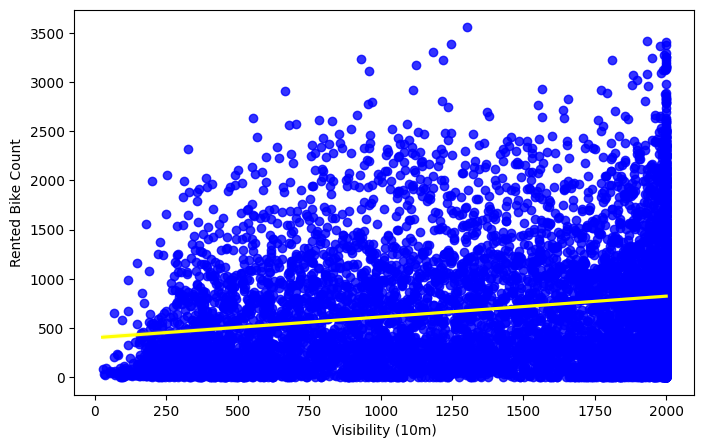

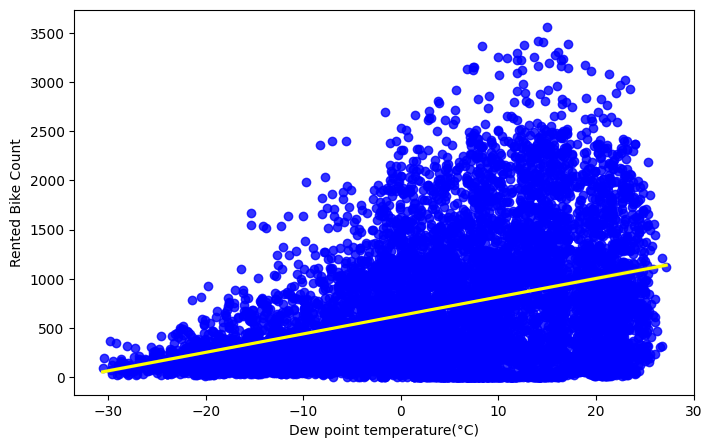

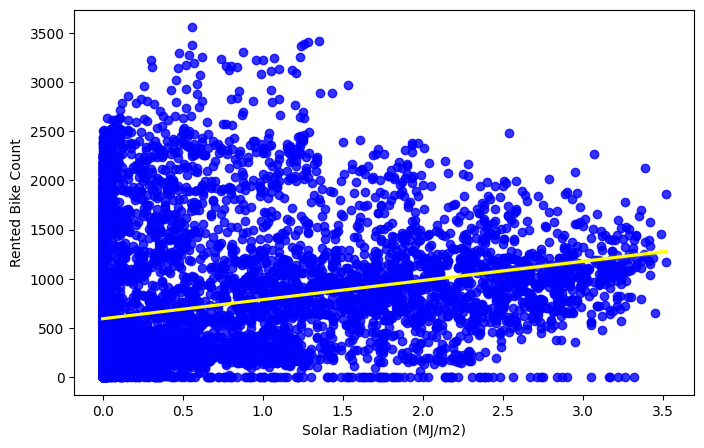

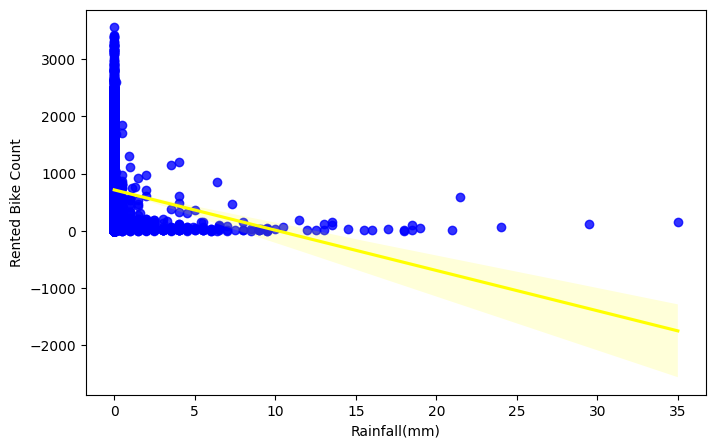

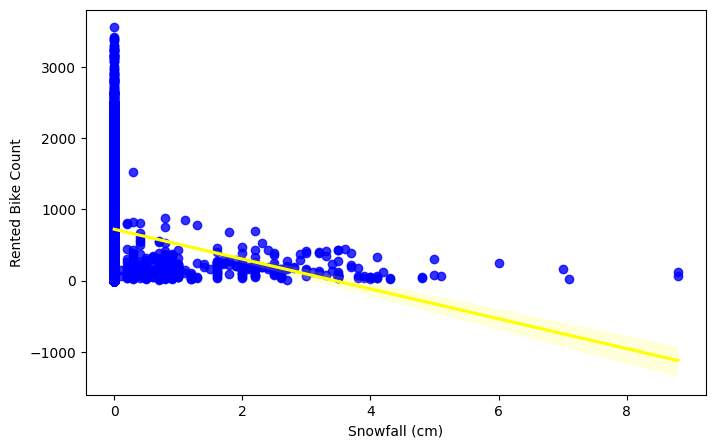

In [37]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(8,5))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": "blue"}, line_kws={"color": "yellow"})

Conclusion

*   From the above regression plots we can see that the independent variables such as  Temperature, Wind speed, Visibility, Dew point temperature and Solar Radiation are positively related to the dependent variable, which means that with increasing the independent variable the count of rental bike is also increases.
*   Rainfall, Snowfall and Humidity are the features that are negatively related with the dependent variable which means that with increasing the independent variable the count of rental bike decreases



##Normalised Rented Bike Count

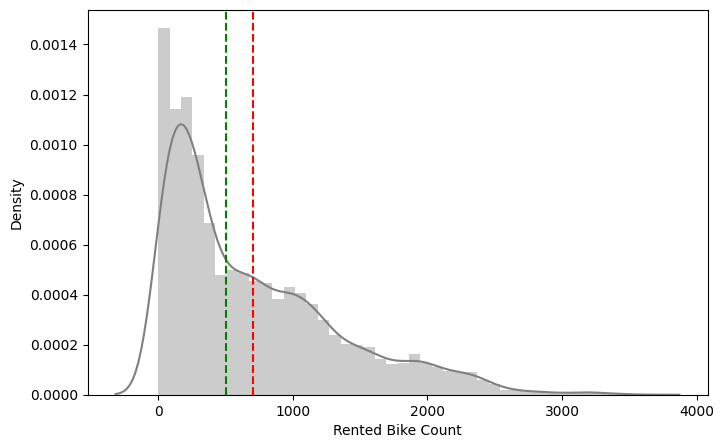

In [38]:
# Distribution plot of Rented Bike Count
plt.figure(figsize=(8,5))
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="grey")
ax.axvline(df['Rented Bike Count'].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
ax.axvline(df['Rented Bike Count'].median(), color='green', linestyle='dashed', linewidth=1.5, label='Median')
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
plt.show()


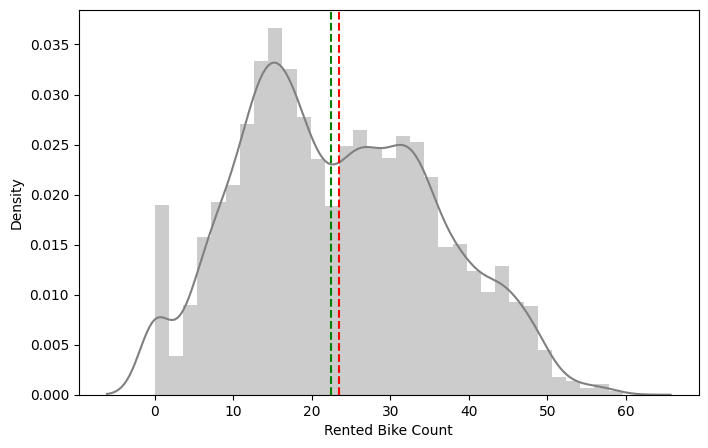

In [39]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(8,5))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="grey")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='red', linestyle='dashed', linewidth=1.5)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='green', linestyle='dashed', linewidth=1.5)

plt.show()

#Handling Outliers

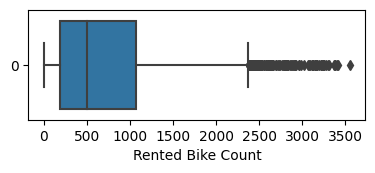

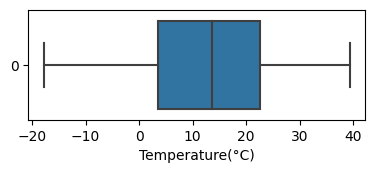

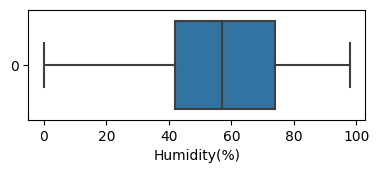

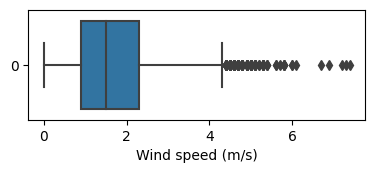

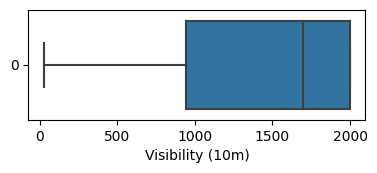

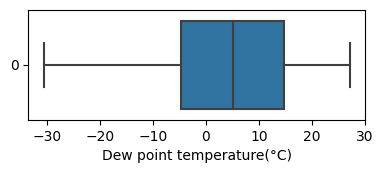

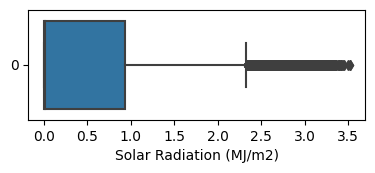

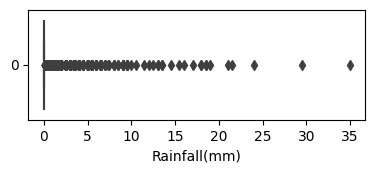

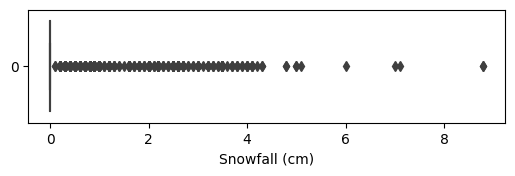

In [40]:
# looking for outliers of every varable of dataset with the help of boxplot
# import warnings
# warnings.simplefilter(action='ignore',category=FutureWarning)

temp = 1

for col in df.describe().columns:
    plt.figure(figsize = (20, 10))
    plt.subplot(6,4,temp)
    sns.boxplot(df[col],orient='h')
    plt.xlabel(col)
    temp+=1

plt.tight_layout()




*   Rented Bike count contains outliers so we should have to remove this outliers
*   Wind Speed, Solar Radiation, Rainfall, and Snowfall contains outlier values we should keep with it.



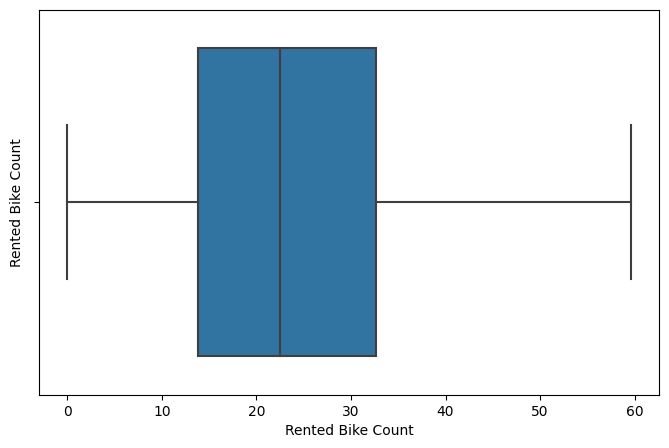

In [41]:
# After applying square root on Rented Bike Count check whether we still have outliers
plt.figure(figsize=(8,5))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()


##Check Correlation between the variables

In [42]:
df.corr()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature(°C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


###Correlation Heatmap

<Axes: >

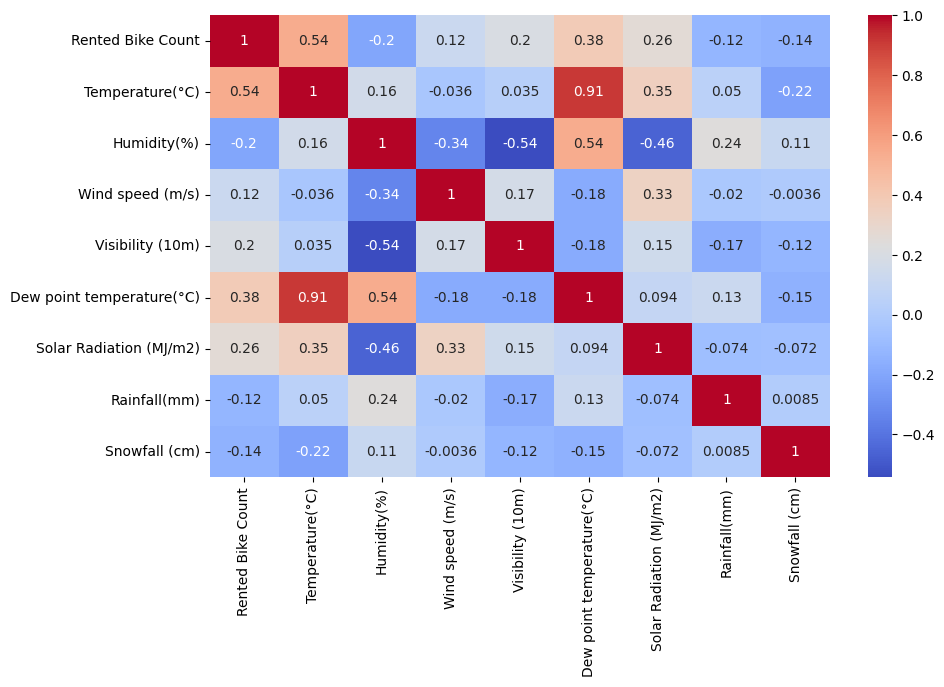

In [43]:
# Correlation Heatmap visualization code
## plot the Correlation matrix
plt.figure(figsize=(10,6))
correlation=df.corr()
sns.heatmap((correlation), annot=True,cmap='coolwarm')

Conclusion -


*   From the above correlation heatmap graph we can observe that rented bike count is positively correlated with the temperature, Dew point temperature, and Solar radiations
*   Rented bike count is negatively correlated with the Humidity, rainfall, snowfall



From the above graph we can clearly see that the temperature and dew point temperature having very high positive correlation(0.91), so if we drop any one of them does not affect our analysis.
So we can drop the column Dew point temperature(°C)

In [44]:
#drop the Dew point temperature column
df = df.drop(['Dew point temperature(°C)'],axis=1)

##Multicollinearity

In [45]:
#  Multicollinearity from variation inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [46]:

# multicollinearity result.

calculate_vif(df[[i for i in df.describe().columns if i not in []]])


,variables,VIF
0,Rented Bike Count,3.428485
1,Temperature(°C),4.415463
2,Humidity(%),4.833669
3,Wind speed (m/s),4.214112
4,Visibility (10m),4.714768
5,Solar Radiation (MJ/m2),2.251838
6,Rainfall(mm),1.095993
7,Snowfall (cm),1.119709


In [47]:

# multicollinearity result.

calculate_vif(df[[i for i in df.describe().columns if i not in ["Temperature(°C)", "	Dew point temperature(°C)"]]])

,variables,VIF
0,Rented Bike Count,2.458317
1,Humidity(%),3.557047
2,Wind speed (m/s),3.955300
3,Visibility (10m),4.701954
4,Solar Radiation (MJ/m2),1.810801
5,Rainfall(mm),1.087762
6,Snowfall (cm),1.063749


There is no multicollinearity present in the above dataframe, so you can go ahead with it.

#Analyze Categorical Vairable

##One Hot Encoding


A one-hot encoding is a way to represent categorical data more effectively. Machine learning algorithms often can't handle categorical data directly, so we need to convert the categories into integer. This conversion is necessary for both input and output variables that are categorical.

In a dataset, we might have different types of values, including categorical values. To work with these categorical values more efficiently in programming, we create dummy variables.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  Month                    8760 non-null   category
 13  weekdays/weekend         8760 non-null   category
dtypes: categ

In [49]:
#Assign all categorical features to single variable
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Month',
       'weekdays/weekend'],
      dtype='object')

In [50]:
#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays/weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_copy.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'weekdays/weekend_1'],
      dtype='object')

In [52]:
df_copy.shape

(8760, 48)

In [53]:
#Assign the value in X and Y
X = df_copy.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df_copy['Rented Bike Count'])


In [54]:
X.shape

(8760, 47)

In [55]:
X.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays/weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [57]:
X.columns

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12', 'weekdays/weekend_1'],
      dtype='object')

**Data scaling**

In [58]:
features = [i for i in X.columns]


In [59]:
print(features)

['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'weekdays/weekend_1']


**Data Scaling**

In [60]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_copy[features])

In this we have different independent features of different scale so we have used standard scalar method to scale our independent features into one scale.

In [61]:
df_copy[features]

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays/weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,4.2,34,2.6,1894,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8756,3.4,37,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8757,2.6,39,0.3,1968,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8758,2.1,41,1.0,1859,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [63]:
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [64]:
print(y_train.shape)
print(y_test.shape)

(6570,)
(2190,)


To train the model we have split the data into train and test using train_test_split method

We have split 80% of our data into train and 20% into test.

**ML Model Implementation**

In [65]:
#Import Model libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

In [66]:
#define a function to print Evaluation Matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 20 important features, and returns a list of the model scores'''

  # Squring the y test and y pred with the help of sqrt transformation
  y_sq_test = np.square(y_test)
  y_sq_pred = np.square(y_pred)
  y_sq_train = np.square(y_train)
  y_train_pred = np.square(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_sq_test,y_sq_pred)
  mae=mean_absolute_error(y_sq_test,y_sq_pred)
  rmse = np.sqrt(mse)
  r2_train = r2_score(y_sq_train, y_train_pred)
  r2 = r2_score(y_sq_test,y_sq_pred)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))


  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(18,6))
  plt.plot((y_sq_pred))
  plt.plot((np.array(y_sq_test)))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Count', fontsize=18)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances


  # feat = pd.Series(importance, index=features)
  # plt.figure(figsize=(12,8))
  # plt.title('Feature Importances (top 20) for '+str(model), fontsize = 18)
  # plt.xlabel('Relative Importance')
  # feat.nlargest(20).plot(kind='barh')


  model_score = [mse,mae,rmse,r2_train,r2,r2_adjusted]
  return model_score


In [67]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE','MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

**Model 1 - Linear Regression**

In [68]:
regressor= LinearRegression()

# Initialize an instance of the class
regressor.fit(X_train, y_train)

# Fit the linear regression model to your training data
y_pred_li = regressor.predict(X_test)

MSE : 112580.16961698837
RMSE : 335.5296851501941
MAE : 228.09256607829423
Train R2 : 0.7251783701493142
Test R2 : 0.7300946073351209
Adjusted R2 :  0.7241723134717926


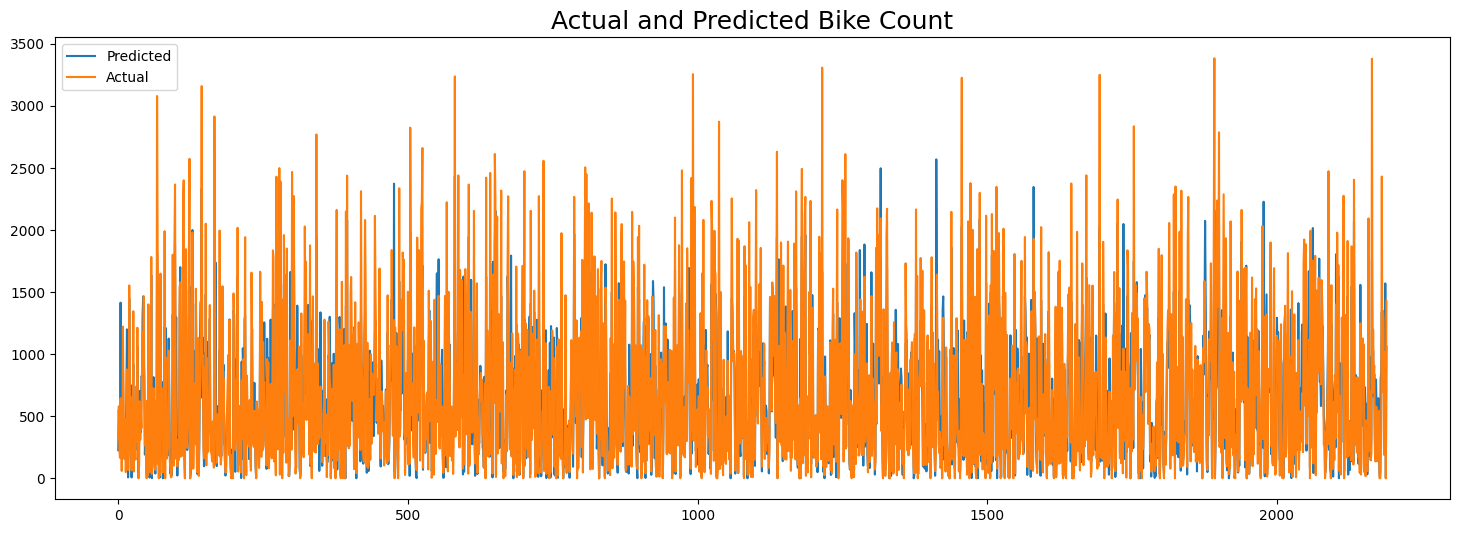

In [69]:
 #check the score
li_score = evaluate_model(regressor, y_test, y_pred_li)
# Evaluation Metric Score chart
score['Linear regression'] = li_score

In [85]:
score

,Linear regression
MSE,112580.169617
RMSE,228.092566
MAE,335.529685
Train R2,0.725178
Test R2,0.730095
Adjusted R2,0.724172


So, using linear regression model we have got accuracy(i.e R2 score) around 72% on train data and same 73% on test data. Which seems to low to predict on unseen data.

**Model 2 - Lasso Regression**

In [90]:
# Import the Lasso Regression class
lasso = Lasso()

# Initialize an instance of the class
lasso.fit(X_train, y_train)

# Fit the lasso regression model to your training data
y_pred_lasso1 = lasso.predict(X_test)

MSE : 202053.53475936374
RMSE : 449.50365377754576
MAE : 302.3487098299884
Train R2 : 0.5050399618408574
Test R2 : 0.5155866364024069
Adjusted R2 :  0.5049575850069414


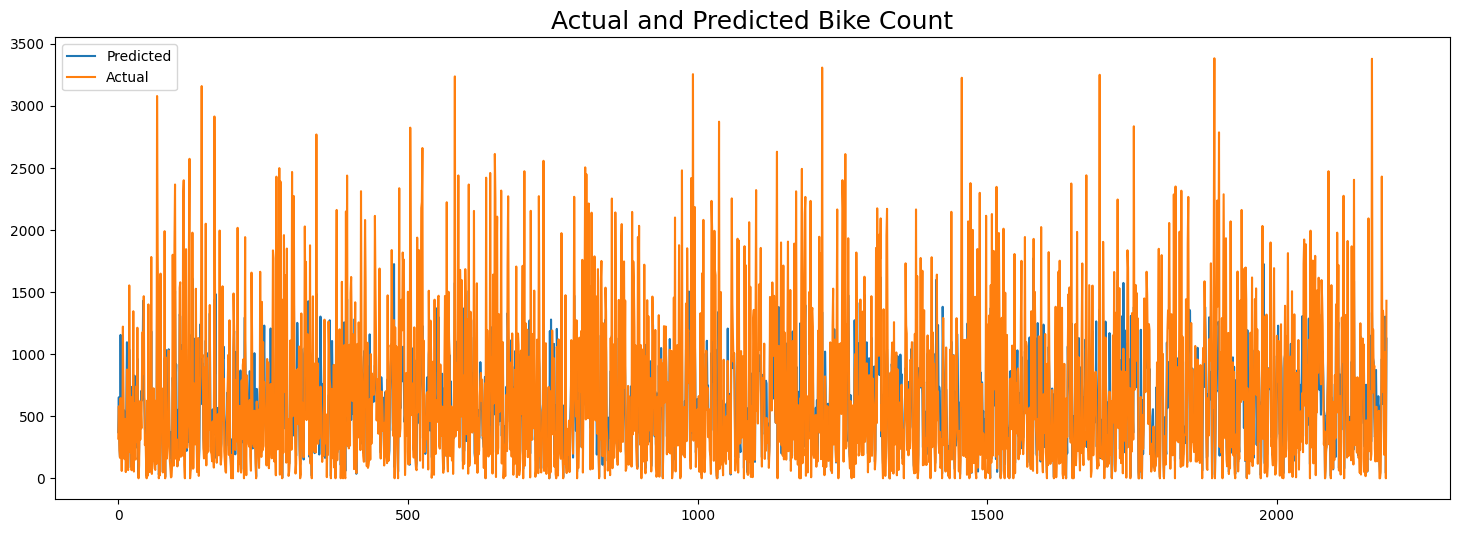

In [91]:
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [92]:
score

,Linear regression,Lasso regression
MSE,112580.169617,202053.534759
RMSE,228.092566,302.348710
MAE,335.529685,449.503654
Train R2,0.725178,0.505040
Test R2,0.730095,0.515587
Adjusted R2,0.724172,0.504958


It is seen that using Lasso regression analysis the performance of the model has drop down. so we will try to tuned the model.

**Model 2.1 - Lasso(tuned)**

In [93]:
#import Lasso regressor and grid search cv
lasso = Lasso()

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
lasso_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [94]:
#getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -38.40875568182749


In [95]:

# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Initialize an instance of the class
lasso.fit(X_train, y_train)

# Fit the lasso regression model to your training data
y_pred_lassocv = lasso.predict(X_test)

MSE : 113053.25647886691
RMSE : 336.2339311831376
MAE : 228.44703120950498
Train R2 : 0.7240866129076601
Test R2 : 0.7289604049648958
Adjusted R2 :  0.7230132243081965


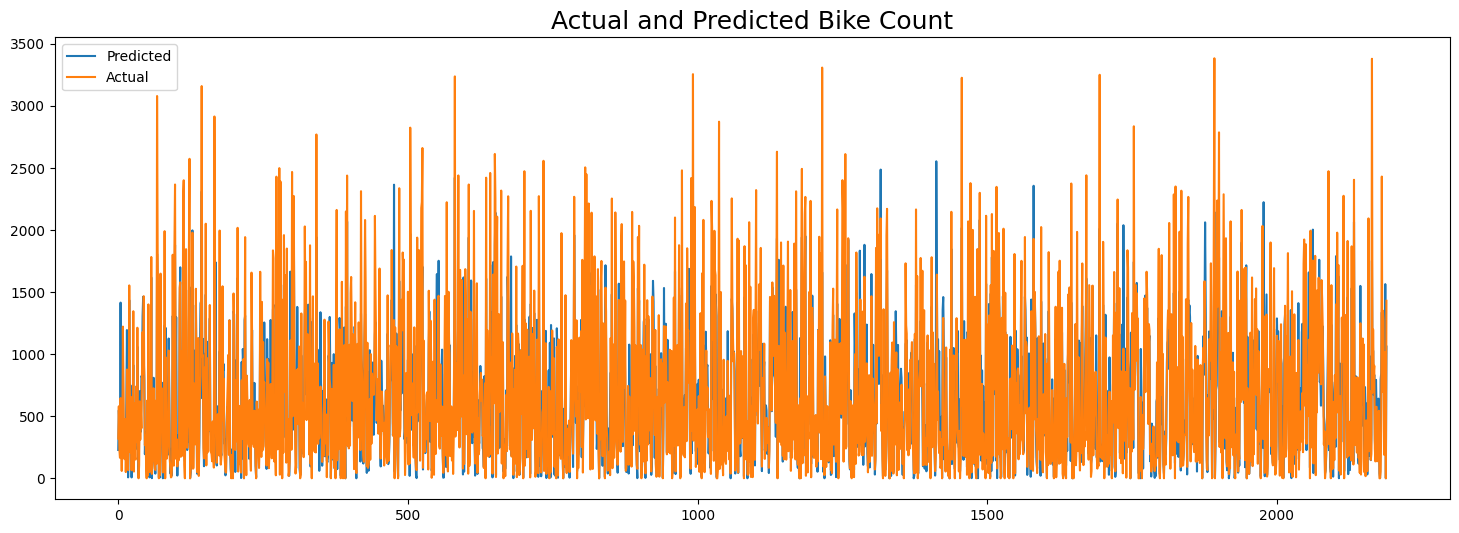

In [96]:

#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

In [97]:
score

,Linear regression,Lasso regression,Lasso with alpha = 0.01
MSE,112580.169617,202053.534759,113053.256479
RMSE,228.092566,302.348710,228.447031
MAE,335.529685,449.503654,336.233931
Train R2,0.725178,0.505040,0.724087
Test R2,0.730095,0.515587,0.728960
Adjusted R2,0.724172,0.504958,0.723013


After tuning we have seen that there is increase in performance from 51% to 72%

RMSE & MSE are measuring the average squared values between the predicted and actual values.

Whereas R2 score is a measure how well the model fits the data.

low RMSE and high R2 score would indicate that the model is making accurate predictions and is a good fit for the data. This would be desirable for a business because it would mean that the model is able to provide useful insights and make accurate predictions about future outcomes.

**Model 3 - Ridge Regression**

In [98]:

# Ridge regressor class
ridge = Ridge()

#prediction for Ridge regression
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

MSE : 112590.90641010164
RMSE : 335.5456845350595
MAE : 228.10166995839955
Train R2 : 0.7251520788224797
Test R2 : 0.7300688664042707
Adjusted R2 :  0.7241460077306017


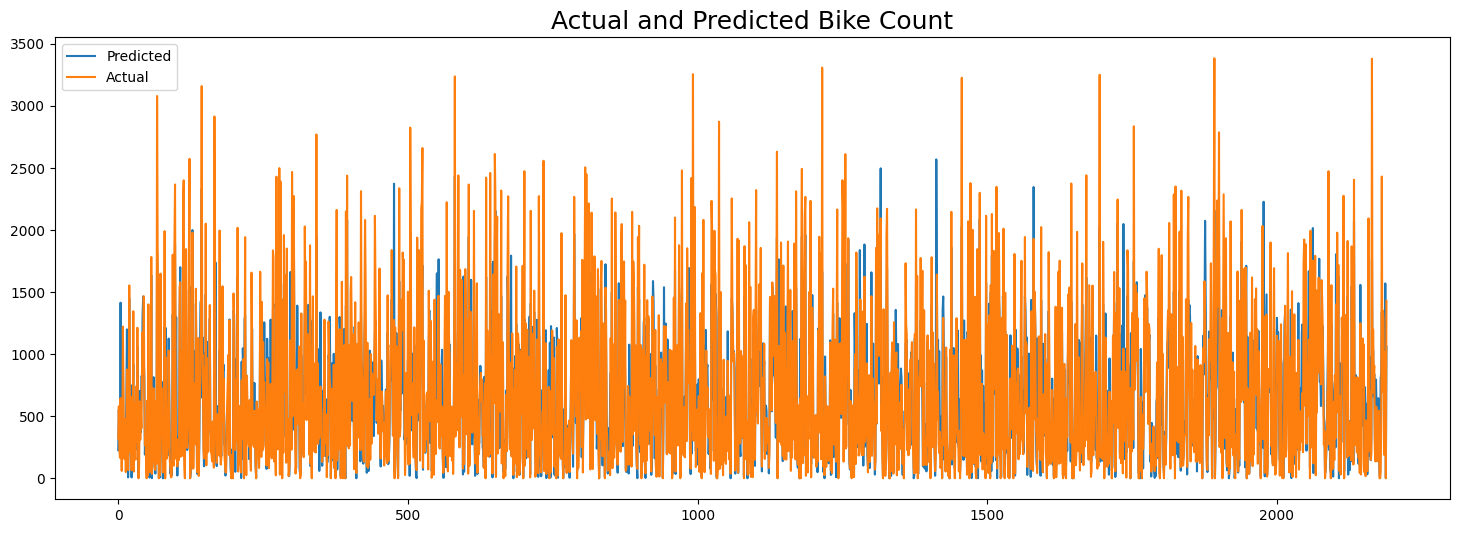

In [99]:
# Evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result


In [100]:
score

,Linear regression,Lasso regression,Lasso with alpha = 0.01,Ridge
MSE,112580.169617,202053.534759,113053.256479,112590.906410
RMSE,228.092566,302.348710,228.447031,228.101670
MAE,335.529685,449.503654,336.233931,335.545685
Train R2,0.725178,0.505040,0.724087,0.725152
Test R2,0.730095,0.515587,0.728960,0.730069
Adjusted R2,0.724172,0.504958,0.723013,0.724146


We have used Ridge regression technique to check the performance of the model and we have found that there is no significant difference in between linear regression and Ridge

**Model 3.1 - Ridge(tuned)**

In [101]:
# Import Ridge regressor Class
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [102]:

#getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -38.41209936012977


In [103]:

# Initiate ridge with best alpha
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

#prediction for Ridge regression
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)

MSE : 112802.73720376227
RMSE : 335.8611874030137
MAE : 228.27978281618545
Train R2 : 0.7246359166068452
Test R2 : 0.7295610125456737
Adjusted R2 :  0.7236270104866853


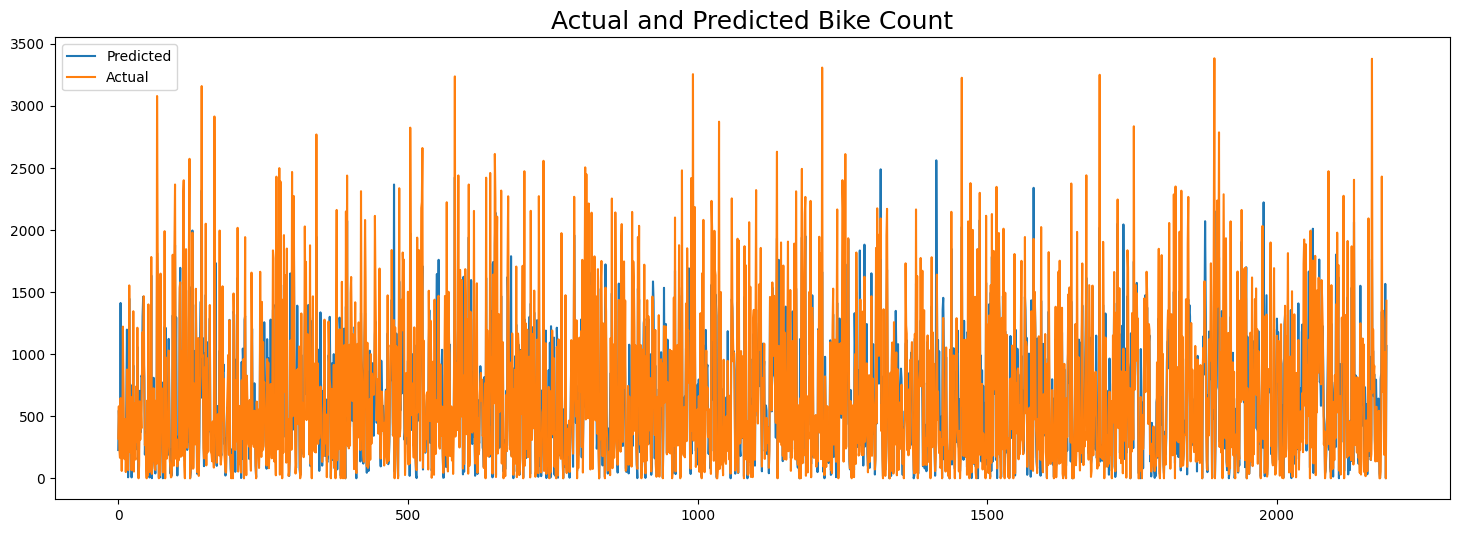

In [104]:

#Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

In [105]:
score

,Linear regression,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 20
MSE,112580.169617,202053.534759,113053.256479,112590.906410,112802.737204
RMSE,228.092566,302.348710,228.447031,228.101670,228.279783
MAE,335.529685,449.503654,336.233931,335.545685,335.861187
Train R2,0.725178,0.505040,0.724087,0.725152,0.724636
Test R2,0.730095,0.515587,0.728960,0.730069,0.729561
Adjusted R2,0.724172,0.504958,0.723013,0.724146,0.723627


**Model 4 - Random Forest**

In [106]:
rf = RandomForestRegressor(random_state=0)
# Fit the Algorithm
rf.fit(X_train,y_train)
# Predict on the model
y_pred_rf1 = rf.predict(X_test)

MSE : 49618.161679700104
RMSE : 222.75134495598473
MAE : 131.34553293334022
Train R2 : 0.9849694338659436
Test R2 : 0.8810429096258172
Adjusted R2 :  0.8784327400424434


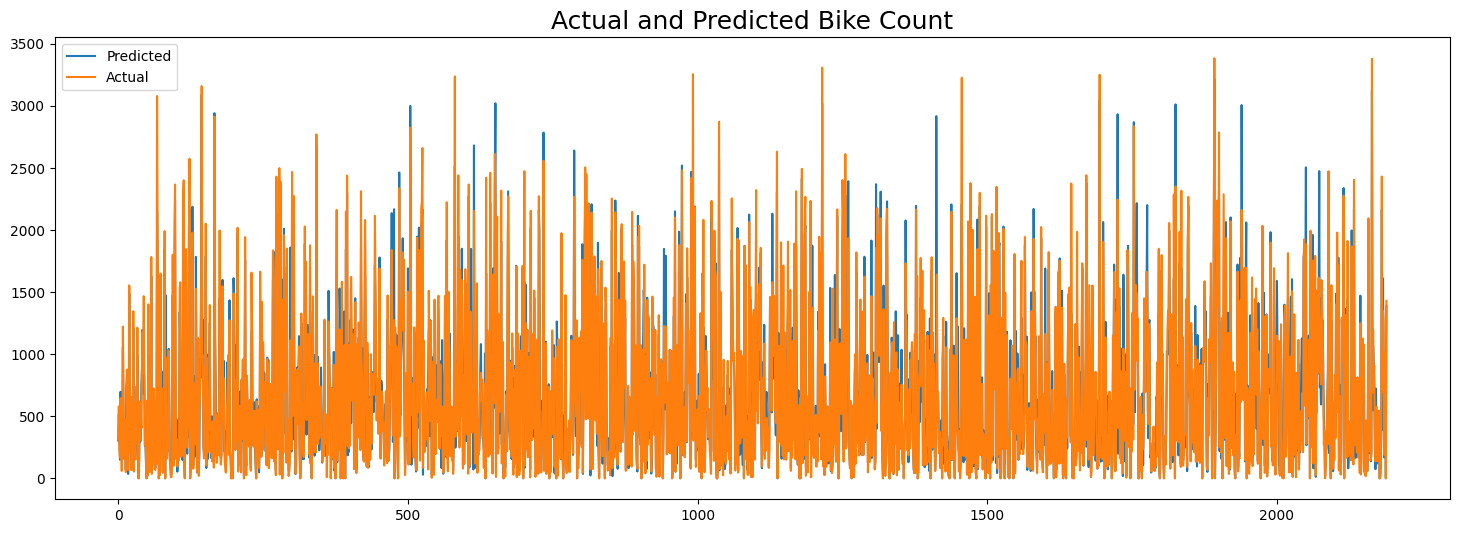

In [107]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [108]:
score

,Linear regression,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 20,Random forest
MSE,112580.169617,202053.534759,113053.256479,112590.906410,112802.737204,49618.161680
RMSE,228.092566,302.348710,228.447031,228.101670,228.279783,131.345533
MAE,335.529685,449.503654,336.233931,335.545685,335.861187,222.751345
Train R2,0.725178,0.505040,0.724087,0.725152,0.724636,0.984969
Test R2,0.730095,0.515587,0.728960,0.730069,0.729561,0.881043
Adjusted R2,0.724172,0.504958,0.723013,0.724146,0.723627,0.878433


Here we have seen that using random forest regression accuracy of the train and test model increases 98% and 90% respectively. which seems to be a good model for prediction.

**Model 5 - Gradient Boosting Regressor**

In [109]:
gb = GradientBoostingRegressor(random_state=0)
# Fit the Algorithm
gb.fit(X_train,y_train)
# Predict on the model
y_pred_gb1 = gb.predict(X_test)

MSE : 78779.58523647014
RMSE : 280.6770123050161
MAE : 185.343614182117
Train R2 : 0.8222540439343923
Test R2 : 0.8111298378785068
Adjusted R2 :  0.8069856279720128


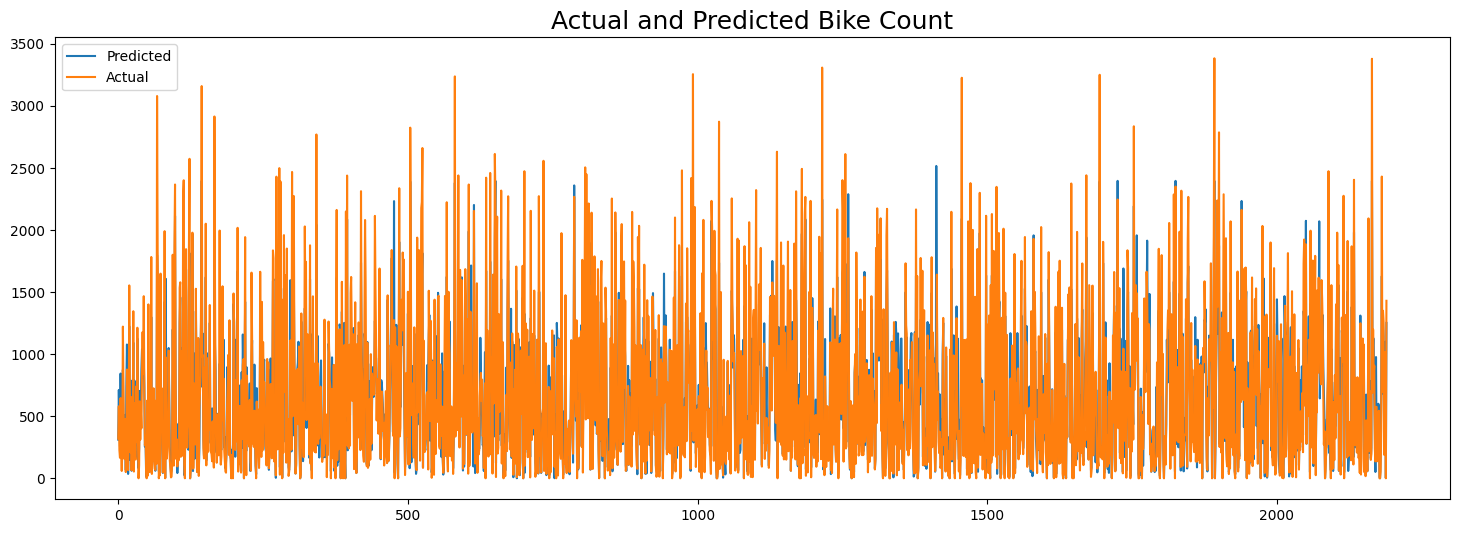

In [110]:

# Evaluation Metric Score chart
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

In [111]:
score

,Linear regression,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 20,Random forest,Gradient Boosting Regressor
MSE,112580.169617,202053.534759,113053.256479,112590.906410,112802.737204,49618.161680,78779.585236
RMSE,228.092566,302.348710,228.447031,228.101670,228.279783,131.345533,185.343614
MAE,335.529685,449.503654,336.233931,335.545685,335.861187,222.751345,280.677012
Train R2,0.725178,0.505040,0.724087,0.725152,0.724636,0.984969,0.822254
Test R2,0.730095,0.515587,0.728960,0.730069,0.729561,0.881043,0.811130
Adjusted R2,0.724172,0.504958,0.723013,0.724146,0.723627,0.878433,0.806986


Using Gradient Boosting Regressor we have got low accuracy around 82% and 81% on train and test data. which less than random forest

**Model 5.1 - Gradient Boosting Regressor(tuned)**

In [112]:
# GBM model
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],
             'min_samples_leaf':np.arange(20,24),
             'max_depth':np.arange(14,17)
             }

In [113]:

# Perform the randomized search
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

gb_best_params = random_search.best_params_

In [114]:
# GBM best parameters
gb_best_params

{'n_estimators': 300, 'min_samples_leaf': 22, 'max_depth': 16}

In [115]:
# Building GBM model with best parameters
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],
                                     random_state=0)


In [116]:
# fit
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=16, min_samples_leaf=22, n_estimators=300,
                          random_state=0)

In [117]:

# gradient boosting test predictions
y_pred_gb = gb_model.predict(X_test)

MSE : 42262.99071695143
RMSE : 205.57964567765805
MAE : 120.30220124450635
Train R2 : 0.9918514724011156
Test R2 : 0.8986765684981736
Adjusted R2 :  0.8964533186006078


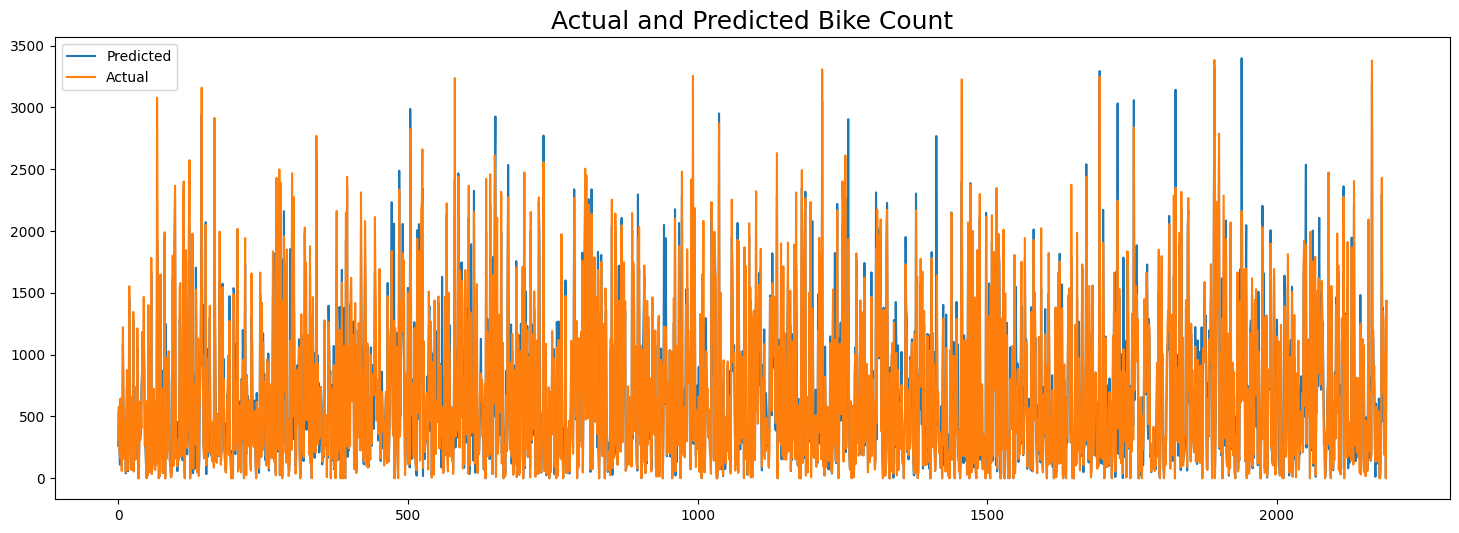

In [118]:

#Evaluation matrices for GradientBoosting
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result


To efficiently explore the hyperparameter space of a machine learning model, Randomized Search Cross-Validation (CV) is utilized.
This method involves randomly sampling from the hyperparameter search space instead of exhaustively trying every combination. By doing so, it allows for a more efficient search process while still maintaining a good chance of finding optimal hyperparameter values.
The use of cross-validation ensures that the model's performance is evaluated without overfitting to the training data.
Randomized Search CV is chosen for its randomized sampling approach and time-saving advantages.

In [119]:
score

,Linear regression,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 20,Random forest,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned
MSE,112580.169617,202053.534759,113053.256479,112590.906410,112802.737204,49618.161680,78779.585236,42262.990717
RMSE,228.092566,302.348710,228.447031,228.101670,228.279783,131.345533,185.343614,120.302201
MAE,335.529685,449.503654,336.233931,335.545685,335.861187,222.751345,280.677012,205.579646
Train R2,0.725178,0.505040,0.724087,0.725152,0.724636,0.984969,0.822254,0.991851
Test R2,0.730095,0.515587,0.728960,0.730069,0.729561,0.881043,0.811130,0.898677
Adjusted R2,0.724172,0.504958,0.723013,0.724146,0.723627,0.878433,0.806986,0.896453


After tuning the model we have got accuracy on train data arround 99 % and approax 90% on test data which is very good.

Plot R2 scores for each model

In [120]:
score.columns

Index(['Linear regression', 'Lasso regression', 'Lasso with alpha = 0.01',
       'Ridge', 'Ridge with alpha = 20', 'Random forest',
       'Gradient Boosting Regressor', 'Gradient Boosting Regressor Tuned'],
      dtype='object')

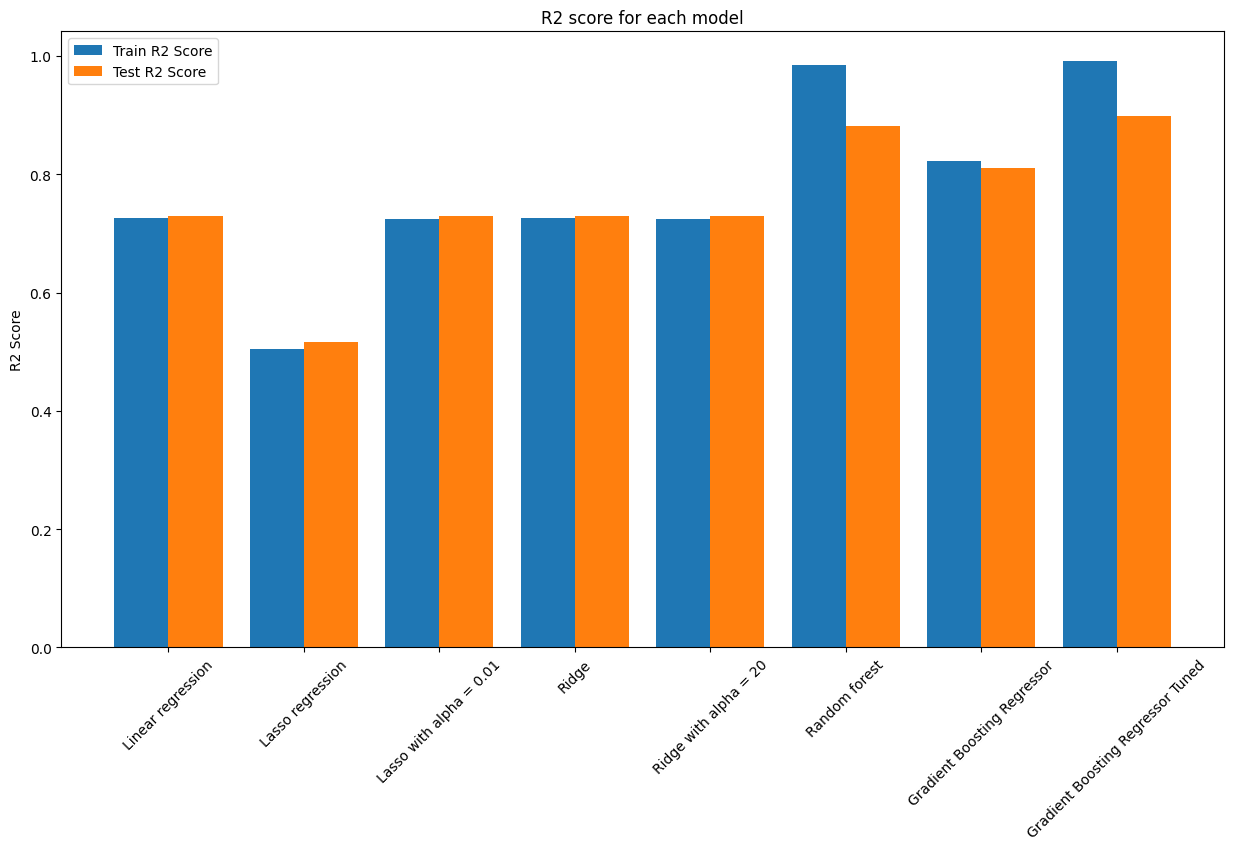

In [133]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(15,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=45)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()


**Conclusion**




*  During the summer season highest demand of rental bike

*  less demand of rental bike in winter season

*  The highest demand for rental bikes was noted in June.

*  On working day, the rental bike demand is high in comparison to holiday.

*  The amount of rented bike is very low When we have more than 4 cm of snow.

*   We see that even if it rains a lot the demand of rent bikes is not
     decreasing.

*   when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.

*   On the basis of all the model we have decided to select R2 score Evaluation matrics which shows the accuracy of the model which is very good indicator to check the feasibility of the model.

*  We have ran a several models like linear regression, lasso Regression,Ridge Regression, random forest, gradient boosting but amongst them we have selected random forest, gradient boosting regressor (tuned) as we achieved higher % in training and testing accuracy


**END**